<h1 style="text-align: justify;"><span style="color: #ffff00; background-color: #000000;"><strong>Thread and Multithreading</strong></span></h1>
<p style="text-align: justify;"><span style="color: #000000;"><strong>Thread</strong>&nbsp;is an execution unit that consists of its own program counter, a stack, and a set of registers where the program counter mainly</a> keeps track of which instruction to execute next, a set of registers mainly hold its current working variables, and a stack mainly contains the history of execution</span></p>
<p style="text-align: justify;"><span style="color: #000000;">Threads are also known as Lightweight processes. Threads are a popular way to improve the performance of an application through parallelism. Threads are mainly used to represent a software approach in order to improve the performance of an operating system just by reducing the overhead thread that is mainly equivalent to a classical process. The CPU switches rapidly back and forth among the threads giving the illusion that the threads are running in parallel. A process can contain multiple threads.</span></p>
<p style="text-align: justify;"><span style="color: #000000;"><strong>Multithreading</strong> is a feature that allows concurrent execution of two or more parts of a program for maximum utilization of CPU. Each part of such program is called a thread. So, threads are light-weight processes within a process.</span></p>

##### Importing required libraries

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import random as r
import string as s
import shutil
import threading
import numpy as np

r.seed(16)

##### Define number of files, number of characters in each line, number of lines in each file, and the directory to store files and their correponding output files

In [2]:
N = 500
K = 20
L = 100
Directory = "Test"

##### Creating directory to store files

In [3]:
os.makedirs(Directory)
os.chdir(Directory)
print('Current working directory : ', os.getcwd())

Current working directory :  E:\Projects\Python\Threading\Test


##### Creating a file with given 'L' number of lines with each line consisting of 'K' random characters (lowercase letters and digits)

In [4]:
with open('file1.txt', 'w') as file:
    for i in range(L + 1):
        file.write(str(''.join(r.choices(s.ascii_lowercase + s.digits, k=K))) + '\n')

##### Copying the same file in the same directory with different names 'N-1' times 

In [5]:
for i in range(2, N + 1):
    _ = shutil.copyfile('file1.txt', 'file' + str(i) + '.txt')

print(N, ' files created')

500  files created


##### Function to convert given number of files to UPPERCASE, and storing the result

In [6]:
def Convert(n1, n2, name):
    
    #creating a directory to store output files
    
    os.makedirs('outputs_' + str(name))
 
    #converting each file to UPPERCASE, and storing converted text in a separate file specified by 'name' argument.

    for j in range(n1, n2 + 1):
        try:
            with open(r'file' + str(j) + '.txt', 'r') as file, open(r'outputs_' + str(name) + '/file' + str(j) + '_output.txt', 'w') as file_up:
                text = file.read()
                text = text.upper()
                file_up.write(text.upper())
        except:
            print("Error! file not found, exiting")
            exit(0)
            
    #time for converting text to UPPERCASE depends on the processor

##### Dictionary to store time taken by varying number of threads

In [7]:
Time = {}

##### Calculating time required to convert text files to UPPERCASE by varying number of threads from 1 to 10 

In [8]:
for i in range(1, 11):
    print('Number of Threads : ', i, '---->')
    L = []
    start = 1
    for j in range(1, i):
        L.append(threading.Thread(target = Convert, args = (start, start + int(N/i) - 1, str(i)+'_'+str(j))))
        start+= int(N/i)
    L.append(threading.Thread(target = Convert, args = (start, N, str(i)+'_'+str(i))))
    tic = time.time()
    for j in L:
        j.start()
    for j in L:
        j.join()
    toc = time.time()
    print("Execution Time : ", toc-tic)
    Time[str(i)] = float(toc-tic)
    print('\n------------------------------\n')

Number of Threads :  1 ---->
Execution Time :  0.6181409358978271

------------------------------

Number of Threads :  2 ---->
Execution Time :  0.4397883415222168

------------------------------

Number of Threads :  3 ---->
Execution Time :  0.30426836013793945

------------------------------

Number of Threads :  4 ---->
Execution Time :  0.23186922073364258

------------------------------

Number of Threads :  5 ---->
Execution Time :  0.23186755180358887

------------------------------

Number of Threads :  6 ---->
Execution Time :  0.2535843849182129

------------------------------

Number of Threads :  7 ---->
Execution Time :  0.24339747428894043

------------------------------

Number of Threads :  8 ---->
Execution Time :  0.23105382919311523

------------------------------

Number of Threads :  9 ---->
Execution Time :  0.2678945064544678

------------------------------

Number of Threads :  10 ---->
Execution Time :  0.9246006011962891

------------------------------



##### Time Taken vs Number of Threads Plot

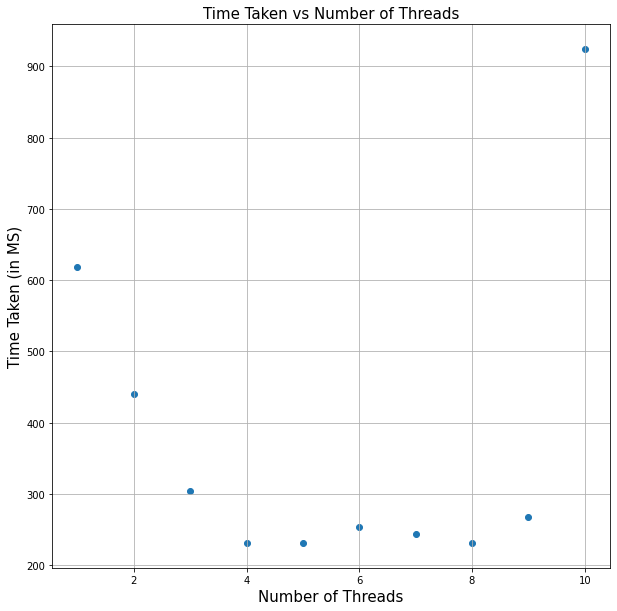

In [9]:
x = [float(i) for i in Time.keys()]
y = [float(i)*1000 for i in Time.values()]

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.title("Time Taken vs Number of Threads", fontsize=15)
plt.xlabel("Number of Threads", fontsize=15)
plt.ylabel("Time Taken (in MS)", fontsize=15)
plt.grid()

plt.show()

##### Plotting corresponding quadratic regression equation to analyse the trend

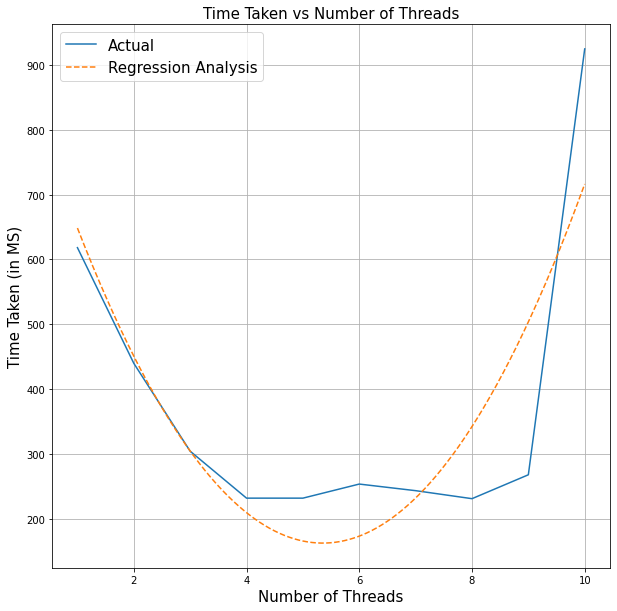

In [10]:
Model = np.poly1d(np.polyfit(x, y, 2))

x_ = np.linspace(1, 10, 1000)
y_ = Model(x_)

plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.title("Time Taken vs Number of Threads", fontsize=15)
plt.xlabel("Number of Threads", fontsize=15)
plt.ylabel("Time Taken (in MS)", fontsize=15)
plt.plot(x_, y_, linestyle='dashed')
plt.grid()
plt.legend(['Actual', 'Regression Analysis'], fontsize = 15)

plt.show()

<h1 style="text-align: justify;"><span style="color: #ffff00; background-color: #000000;"><strong>Conclusion</strong></span></h1>
<p style="text-align: justify;">It can be observed that the time taken w.r.t. number of threads varies as a parabolic curve. Time Taken decreases upto a certain amount (optimal amount of threads), and then increases again due to the fact of <strong>context switching </strong>of more number of threads.</p>